# Basics of cluster analysis

In this notebook we explore the very basics of cluster analysis with k-means

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()

## Load the data

In [2]:
# Load the country clusters data
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
# Check out the data manually 
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


The latitudes and longitudes are the geographic centers of the countries

## Plot the data

<function matplotlib.pyplot.show(*args, **kw)>

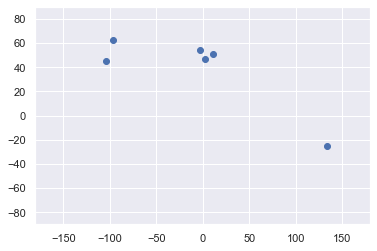

In [4]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

In [5]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [6]:
# Check if we worked correctly
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [7]:
# However you can achieve the same result by simple dataframe operation
x = data[['Latitude','Longitude']]

In [8]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

This is the part of the sheet which deals with the actual clustering

In [15]:
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

In [16]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)

### fit() vs predict() vs fit_predict()
fit() builds the model from the training data (e.g. for kmeans, it finds the centroids),

predict() assigns labels to the data after building the model, and

fit_predict() does both at the same data (e.g in kmeans, it finds the centroids and assigns the labels to the dataset).

In [17]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

There are many ways to do this part, we found this to be the most illustrative one

In [18]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [19]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


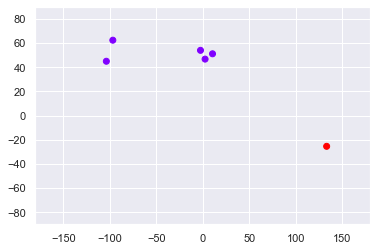

In [20]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

**Easier way is to plot using sns, it gives you legend as well**

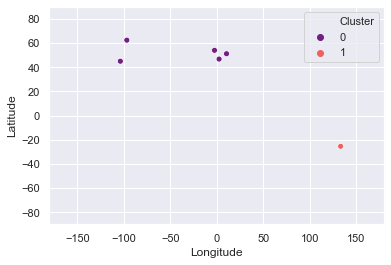

In [21]:
plt.xlim(-180,180)
plt.ylim(-90,90)
sns.scatterplot(data_with_clusters['Longitude'],data_with_clusters['Latitude'], hue=data_with_clusters['Cluster'], palette='magma')


### Getting Cluster centers

In [22]:
kmeans.cluster_centers_

array([[ 51.856, -38.06 ],
       [-25.45 , 133.11 ]])

### Trying the same with 3 clusters

In [23]:
kmeans3 = KMeans(3)

In [24]:
identified_clusters3 = kmeans3.fit_predict(x)

In [25]:
# Check the result
identified_clusters3

array([2, 2, 0, 0, 0, 1])

In [26]:
# Create a copy of the data
data_with_clusters3 = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters3['Cluster'] = identified_clusters3
# Check the result
data_with_clusters3

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


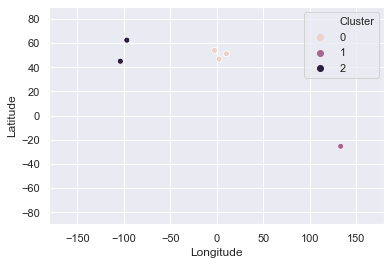

In [27]:
plt.xlim(-180,180)
plt.ylim(-90,90)
sns.scatterplot(data_with_clusters3['Longitude'],data_with_clusters3['Latitude'], hue=data_with_clusters3['Cluster'])

In [28]:
#Cluster Centers
kmeans3.cluster_centers_

array([[  50.63666667,    3.42333333],
       [ -25.45      ,  133.11      ],
       [  53.685     , -100.285     ]])

## Cluster based on Categorical Featuress

In [29]:
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


**Let's encode the Language column and use this column only to cluster the dataset**

In [30]:
data_mapped = data.copy()

In [31]:
x1 = data_mapped['Language'].map({'English':0,'French':1,'German':2})

In [32]:
x1

0    0
1    0
2    1
3    0
4    2
5    0
Name: Language, dtype: int64

In [33]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans4 = KMeans(2)

In [34]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans4.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Checking Results

In [35]:
identified_clusters4 = kmeans4.fit_predict(x)

In [36]:
identified_clusters4

array([0, 0, 0, 0, 0, 1])

In [37]:
data_with_clusters4 = data_mapped.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters4['Cluster'] = identified_clusters4
# Check the result
data_with_clusters4

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


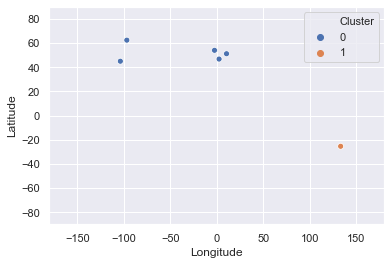

In [38]:
plt.xlim(-180,180)
plt.ylim(-90,90)
sns.scatterplot(data_with_clusters4['Longitude'],data_with_clusters4['Latitude'], hue=data_with_clusters4['Cluster'])

#### Getting cluster centers

In [39]:
kmeans4.cluster_centers_

array([[ 51.856, -38.06 ],
       [-25.45 , 133.11 ]])

## Using Numerical and Categorical data in clustering

In [40]:
x5 = data[['Latitude','Longitude']]

In [41]:
x5 = pd.concat([x5, data['Language'].map({'English':0,'French':1,'German':2})], axis=1)

In [42]:
x5

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [43]:
kmeans5 = KMeans(3)

In [44]:
identified_clusters5 = kmeans5.fit_predict(x5)

In [45]:
data_with_clusters5 = data_mapped.copy()
data_with_clusters5['Cluster'] = identified_clusters5
# Check the result
data_with_clusters5

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


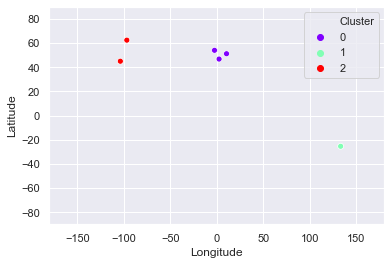

In [46]:
plt.xlim(-180,180)
plt.ylim(-90,90)
sns.scatterplot(data_with_clusters5['Longitude'],data_with_clusters5['Latitude'], hue=data_with_clusters5['Cluster'], palette='rainbow')

In [47]:
identified_clusters5

array([2, 2, 0, 0, 0, 1])

In [48]:
kmeans5.cluster_centers_

array([[  50.63666667,    3.42333333,    1.        ],
       [ -25.45      ,  133.11      ,    0.        ],
       [  53.685     , -100.285     ,    0.        ]])

# Selecting the optimal number of clusters

### The Elbow Method: 
**To get the optimal number of 'K' we plot the WCSS vs number of 'K' and decide**

#### WCSS (within-cluster sum of squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.<br>

In [49]:
# Get the WCSS for the current solution
kmeans5.inertia_

290.10523333333333

In [50]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    # Cluster solution with i clusters
    kmeans6 = KMeans(i)
    # Fit the data
    kmeans6.fit(x)
    # Find WCSS for the current iteration
    wcss_iter = kmeans6.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)

In [51]:
# Let's see what we got
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

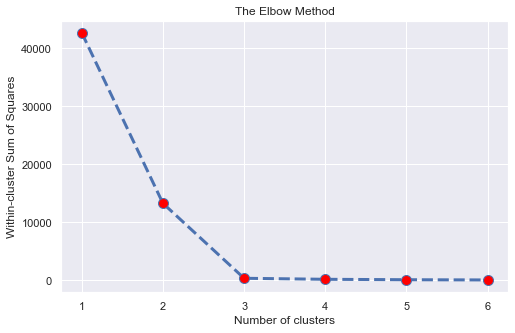

In [52]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)

#Size of plot
plt.figure(figsize=(8,5))
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss, linestyle='--', marker='o', markerfacecolor='red', linewidth=3, markersize=10)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')